# Visão Computacional e Deep Learning para Sensoriamento Remoto com Python


# Capítulo 14 - Arquiteturas Avançadas de Segmentação Semântica - Parte 3

## HRNet

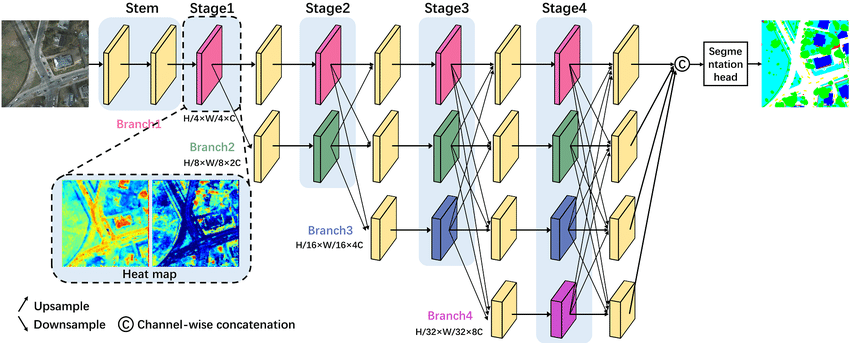

A HRNet mantém representações de alta resolução durante todo o processo. Começamos com um fluxo de convolução de alta resolução, gradualmente adicionamos fluxos de convolução de alta a baixa resolução, um por um, e conectamos os fluxos de multi-resolução em paralelo. A rede resultante consiste em vários estágios (quatro no projeto atual), conforme ilustrado, e o n-ésimo estágio contém n fluxos correspondentes a n resoluções. Conduzimos fusões repetidas de multi-resolução, trocando as informações através dos fluxos paralelos repetidas vezes.

As representações de alta resolução aprendidas com o HRNet não são apenas semanticamente fortes, mas também espacialmente precisas. Isso vem de dois aspectos. Primeiro, nossa abordagem conecta fluxos de convolução de alta a baixa resolução em paralelo, em vez de em série. Portanto, nossa abordagem é capaz de manter a alta resolução em vez de recuperar a alta resolução da baixa resolução, e a representação aprendida é espacialmente mais precisa. Em segundo lugar, a maioria dos esquemas de fusão existentes agrega representações de baixo nível de alta resolução e representações de alto nível de baixa resolução com upsampling. Em vez disso, repetimos fusões multi-resolução para aumentar as representações de alta resolução com a ajuda das representações de baixa resolução e vice-versa. Como resultado, todas as representações de alta para baixa resolução são semanticamente mais fortes.

O HRNet comparado aos métodos de última geração, U-Net++, DeepLab e PSPNet nos dados de validação do Cityscapes é fornecido na Tabela abaixo. Podemos ver que o HRNet alcança melhores resultados com ainda menos complexidade de parâmetros e computação. Comparação com o estado da arte existente no teste Cityscapes:

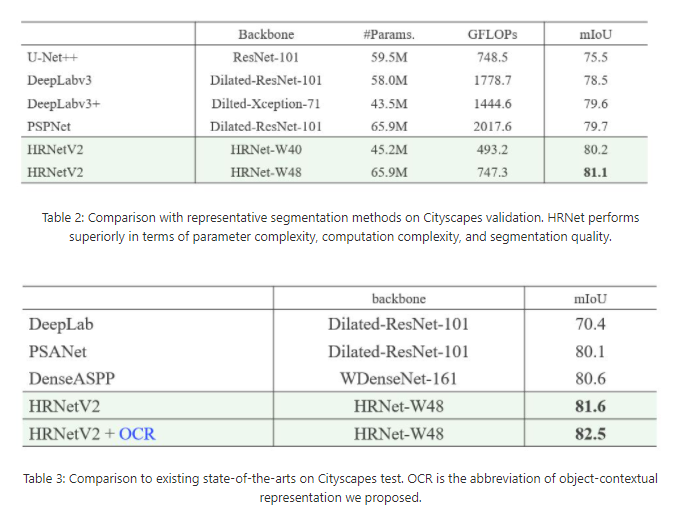

# Desafio Landslide4sense

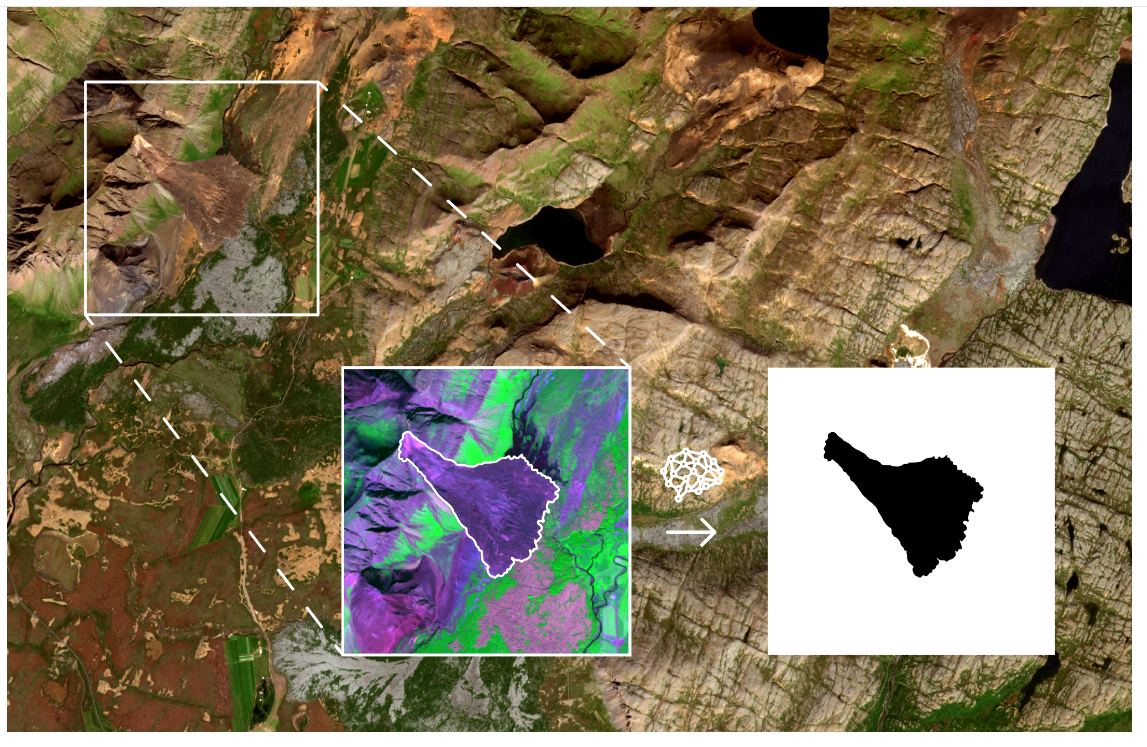

Os deslizamentos de terra são um fenômeno natural com consequências devastadoras, frequentes em muitas partes do mundo. Milhares de movimentos de terra de pequeno e médio porte seguem terremotos ou chuvas fortes. Deslizamentos de terra tornaram-se mais prejudiciais nos últimos anos devido às mudanças climáticas, crescimento populacional e urbanização não planejada em áreas montanhosas instáveis. A detecção precoce de deslizamentos de terra é fundamental para uma resposta rápida e gerenciamento das consequências. A detecção precisa fornece informações sobre a localização e extensão exatas do deslizamento, o que é necessário para a modelagem de suscetibilidade a deslizamentos e avaliação de risco.

Avanços recentes em aprendizado de máquina e visão computacional combinados com a crescente disponibilidade de imagens de satélite e recursos computacionais facilitaram o rápido progresso na detecção de deslizamentos de terra. O Landslide4Sense pretende promover a investigação neste sentido e desafia os participantes a detetar deslizamentos de terra à volta do globo utilizando imagens de satélite multi-sensor. As imagens são coletadas de diversas regiões geográficas, oferecendo um recurso importante para comunidades de sensoriamento remoto, visão computacional e aprendizado de máquina.

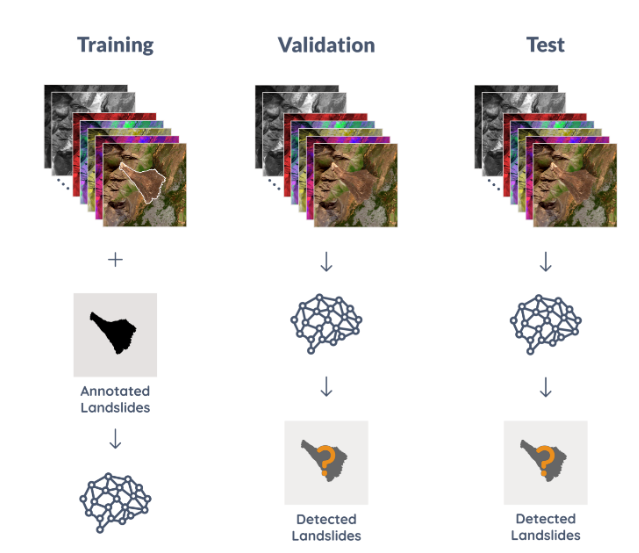

## O Dataset

Os dados do Landslide4Sense consistem nos conjuntos de treinamento, validação e teste contendo 3799, 245 e 800 patches de imagem, respectivamente. Cada patch de imagem é um composto de 14 bandas que incluem:
Dados multiespectrais do Sentinel-2: B1, B2, B3, B4, B5, B6, B7, B8, B9, B10, B11, B12.
Dados de inclinação de ALOS PALSAR: B13.
Modelo digital de elevação (DEM) de ALOS PALSAR: B14.

Todas as bandas no conjunto de dados da competição são redimensionadas para a resolução de aproximadamente 10m por pixel. Os patches de imagem têm o tamanho de 128 x 128 pixels e são rotulados por pixel.

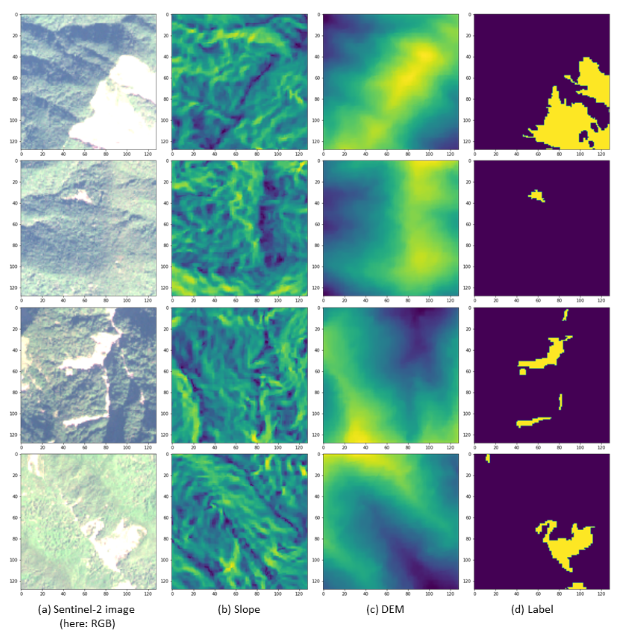

Vamos iniciar conectando o Drive e importando as bibliotecas:

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import glob
import os
import cv2
import numpy as np
import h5py
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

Setamos os caminhos onde estão as imagens e as mascaras:

In [ ]:
path_train_images = '/content/drive/MyDrive/Datasets/Landslide dataset/TrainData/img'
path_train_masks = '/content/drive/MyDrive/Datasets/Landslide dataset/TrainData/mask'

In [ ]:
list_train_img = os.listdir(path_train_images)
list_train_msk = os.listdir(path_train_masks)

In [ ]:
list_train_img.sort()
list_train_msk.sort()

Importamos as imagens e mascaras:

In [ ]:
X = []
for f in list_train_img:
  with h5py.File(os.path.join(path_train_images,f), 'r') as hf:
    img_arr = hf.get('img')[:]
  print(img_arr.shape)
  X.append(img_arr)
X = np.array(X)

(128, 128, 14)
(128, 128, 14)
(128, 128, 14)
(128, 128, 14)
(128, 128, 14)
(128, 128, 14)
(128, 128, 14)
(128, 128, 14)
(128, 128, 14)
(128, 128, 14)
(128, 128, 14)
(128, 128, 14)
(128, 128, 14)
(128, 128, 14)
(128, 128, 14)
(128, 128, 14)
(128, 128, 14)
(128, 128, 14)
(128, 128, 14)
(128, 128, 14)
(128, 128, 14)
(128, 128, 14)
(128, 128, 14)
(128, 128, 14)
(128, 128, 14)
(128, 128, 14)
(128, 128, 14)
(128, 128, 14)
(128, 128, 14)
(128, 128, 14)
(128, 128, 14)
(128, 128, 14)
(128, 128, 14)
(128, 128, 14)
(128, 128, 14)
(128, 128, 14)
(128, 128, 14)
(128, 128, 14)
(128, 128, 14)
(128, 128, 14)
(128, 128, 14)
(128, 128, 14)
(128, 128, 14)
(128, 128, 14)
(128, 128, 14)
(128, 128, 14)
(128, 128, 14)
(128, 128, 14)
(128, 128, 14)
(128, 128, 14)
(128, 128, 14)
(128, 128, 14)
(128, 128, 14)
(128, 128, 14)
(128, 128, 14)
(128, 128, 14)
(128, 128, 14)
(128, 128, 14)
(128, 128, 14)
(128, 128, 14)
(128, 128, 14)
(128, 128, 14)
(128, 128, 14)
(128, 128, 14)
(128, 128, 14)
(128, 128, 14)
(128, 128,

In [ ]:
for i in range(X.shape[3]):
   X[:,:,:,i] = cv2.normalize(X[:,:,:,i], None, alpha=0, beta=1, norm_type=cv2.NORM_MINMAX)

In [ ]:
Y = []
for f in list_train_msk:
  with h5py.File(os.path.join(path_train_masks,f), 'r') as hf:
    img_arr = hf.get('mask')[:]
  print(img_arr.shape)
  Y.append(img_arr)
Y = np.array(Y)

(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)

Após criarmos a variável X que contém as imagens e a variável Y que contém as mascaras, vamos plotar um exemplo:

(-0.5, 127.5, 127.5, -0.5)

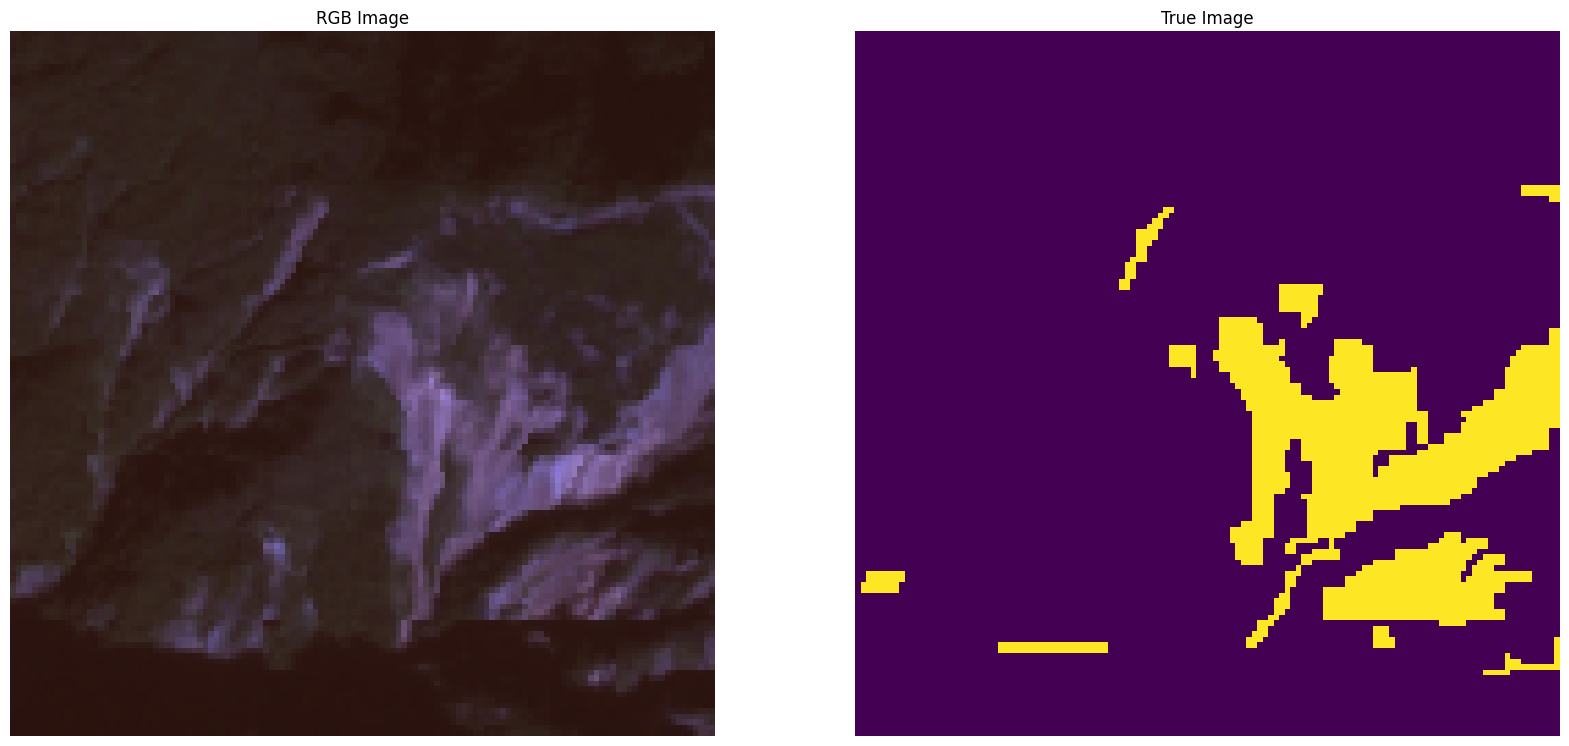

In [ ]:
i = 4
plt.figure(figsize=[20,20])
plt.subplot(121)
plt.imshow(X[i,:,:,1:4]/0.2)
plt.title('RGB Image')
plt.axis('off')
plt.subplot(122)
plt.imshow(Y[i,:])
plt.title('True Image')
plt.axis('off')

O próximo passo é dividir o dataset em treinameno e teste e importar algumas funções do Keras:

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=10)

In [ ]:
del X,Y

In [ ]:
y_train = y_train.astype('float')

In [ ]:
from keras.models import Model
from keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D, concatenate, Concatenate, add, Conv2DTranspose, BatchNormalization, Dropout, Activation, Add, AveragePooling2D, Lambda, SeparableConv2D, GlobalAveragePooling2D, DepthwiseConv2D, ZeroPadding2D, LeakyReLU
#from tensorflow.keras.optimizers import Adam
from tensorflow.keras.optimizers.legacy import Adam
from keras.activations import relu
from keras.preprocessing.image import ImageDataGenerator
from keras.losses import binary_crossentropy
from keras import backend as K
import tensorflow as tf
from keras.models import load_model
from keras.models import model_from_json

In [ ]:
def jaccard_coef(y_true, y_pred,smooth=100):
  # __author__ = Vladimir Iglovikov
  intersection = K.sum(y_true * y_pred, axis=[0, -1, -2])
  sum_ = K.sum(y_true + y_pred, axis=[0, -1, -2])

  jac = (intersection + smooth) / (sum_ - intersection + smooth)

  return K.mean(jac)

def jaccard_loss(y_true, y_pred):
  return 1 - jaccard_coef(y_true, y_pred)

def dice_coef(y_true, y_pred, smooth=1.):
    y_true_f = K.flatten(y_true)
    y_pred_f = K.flatten(y_pred)
    intersection = K.sum(y_true_f * y_pred_f)
    return (2. * intersection + smooth) / (
                K.sum(y_true_f) + K.sum(y_pred_f) + smooth)

def dice_coef_loss(y_true, y_pred):
    return 1 - dice_coef(y_true, y_pred)


def bce_dice_loss(y_true, y_pred):
    return binary_crossentropy(y_true, y_pred) + dice_coef_loss(y_true, y_pred)

Vamos usar o aumento de dados para obtermos mais exemplos pra treinar:

In [ ]:
y_test = y_test.astype('float')
y_test = y_test[:,:,:,np.newaxis]
y_train = y_train[:,:,:,np.newaxis]

In [ ]:
img_datagen = ImageDataGenerator(
    rotation_range=90,
    vertical_flip = True,
    horizontal_flip=True)

mask_datagen = ImageDataGenerator(
    rotation_range=90,
    vertical_flip = True,
    horizontal_flip=True)

In [ ]:
img_datagen.fit(x_train, augment=True,seed=1200)
mask_datagen.fit(y_train, augment=True,seed=1200)

/usr/local/lib/python3.10/dist-packages/keras/preprocessing/image.py:2092: UserWarning: Expected input to be images (as Numpy array) following the data format convention "channels_last" (channels on axis 3), i.e. expected either 1, 3 or 4 channels on axis 3. However, it was passed an array with shape (2659, 128, 128, 14) (14 channels).
  warnings.warn(


In [ ]:
X=img_datagen.flow(x_train,batch_size=10,seed=1200)
Y=mask_datagen.flow(y_train,batch_size=10,seed=1200)

/usr/local/lib/python3.10/dist-packages/keras/preprocessing/image.py:766: UserWarning: NumpyArrayIterator is set to use the data format convention "channels_last" (channels on axis 3), i.e. expected either 1, 3, or 4 channels on axis 3. However, it was passed an array with shape (2659, 128, 128, 14) (14 channels).
  warnings.warn(


In [ ]:
train_generator = zip(X, Y)

In [ ]:
steps_per_epoch = len(x_train)//10
validation_steps = len(x_test)//10

Vamos usar a implementação da HRNet:

In [ ]:
def conv3x3(x, out_filters, strides=(1, 1)):
    x = Conv2D(out_filters, 3, padding='same', strides=strides, use_bias=False, kernel_initializer='he_normal')(x)
    return x


def basic_Block(input, out_filters, strides=(1, 1), with_conv_shortcut=False):
    x = conv3x3(input, out_filters, strides)
    x = BatchNormalization(axis=3)(x)
    x = Activation('relu')(x)

    x = conv3x3(x, out_filters)
    x = BatchNormalization(axis=3)(x)

    if with_conv_shortcut:
        residual = Conv2D(out_filters, 1, strides=strides, use_bias=False, kernel_initializer='he_normal')(input)
        residual = BatchNormalization(axis=3)(residual)
        x = add([x, residual])
    else:
        x = add([x, input])

    x = Activation('relu')(x)
    return x


def bottleneck_Block(input, out_filters, strides=(1, 1), with_conv_shortcut=False):
    expansion = 4
    de_filters = int(out_filters / expansion)

    x = Conv2D(de_filters, 1, use_bias=False, kernel_initializer='he_normal')(input)
    x = BatchNormalization(axis=3)(x)
    x = Activation('relu')(x)

    x = Conv2D(de_filters, 3, strides=strides, padding='same', use_bias=False, kernel_initializer='he_normal')(x)
    x = BatchNormalization(axis=3)(x)
    x = Activation('relu')(x)

    x = Conv2D(out_filters, 1, use_bias=False, kernel_initializer='he_normal')(x)
    x = BatchNormalization(axis=3)(x)

    if with_conv_shortcut:
        residual = Conv2D(out_filters, 1, strides=strides, use_bias=False, kernel_initializer='he_normal')(input)
        residual = BatchNormalization(axis=3)(residual)
        x = add([x, residual])
    else:
        x = add([x, input])

    x = Activation('relu')(x)
    return x


def stem_net(input):
    x = Conv2D(64, 3, strides=(2, 2), padding='same', use_bias=False, kernel_initializer='he_normal')(input)
    x = BatchNormalization(axis=3)(x)
    x = Activation('relu')(x)

    # x = Conv2D(64, 3, strides=(2, 2), padding='same', use_bias=False, kernel_initializer='he_normal')(x)
    # x = BatchNormalization(axis=3)(x)
    # x = Activation('relu')(x)

    x = bottleneck_Block(x, 256, with_conv_shortcut=True)
    x = bottleneck_Block(x, 256, with_conv_shortcut=False)
    x = bottleneck_Block(x, 256, with_conv_shortcut=False)
    x = bottleneck_Block(x, 256, with_conv_shortcut=False)

    return x


def transition_layer1(x, out_filters_list=[32, 64]):
    x0 = Conv2D(out_filters_list[0], 3, padding='same', use_bias=False, kernel_initializer='he_normal')(x)
    x0 = BatchNormalization(axis=3)(x0)
    x0 = Activation('relu')(x0)

    x1 = Conv2D(out_filters_list[1], 3, strides=(2, 2),
                padding='same', use_bias=False, kernel_initializer='he_normal')(x)
    x1 = BatchNormalization(axis=3)(x1)
    x1 = Activation('relu')(x1)

    return [x0, x1]


def make_branch1_0(x, out_filters=32):
    x = basic_Block(x, out_filters, with_conv_shortcut=False)
    x = basic_Block(x, out_filters, with_conv_shortcut=False)
    x = basic_Block(x, out_filters, with_conv_shortcut=False)
    x = basic_Block(x, out_filters, with_conv_shortcut=False)
    return x


def make_branch1_1(x, out_filters=64):
    x = basic_Block(x, out_filters, with_conv_shortcut=False)
    x = basic_Block(x, out_filters, with_conv_shortcut=False)
    x = basic_Block(x, out_filters, with_conv_shortcut=False)
    x = basic_Block(x, out_filters, with_conv_shortcut=False)
    return x


def fuse_layer1(x):
    x0_0 = x[0]
    x0_1 = Conv2D(32, 1, use_bias=False, kernel_initializer='he_normal')(x[1])
    x0_1 = BatchNormalization(axis=3)(x0_1)
    x0_1 = UpSampling2D(size=(2, 2))(x0_1)
    x0 = add([x0_0, x0_1])

    x1_0 = Conv2D(64, 3, strides=(2, 2), padding='same', use_bias=False, kernel_initializer='he_normal')(x[0])
    x1_0 = BatchNormalization(axis=3)(x1_0)
    x1_1 = x[1]
    x1 = add([x1_0, x1_1])
    return [x0, x1]


def transition_layer2(x, out_filters_list=[32, 64, 128]):
    x0 = Conv2D(out_filters_list[0], 3, padding='same', use_bias=False, kernel_initializer='he_normal')(x[0])
    x0 = BatchNormalization(axis=3)(x0)
    x0 = Activation('relu')(x0)

    x1 = Conv2D(out_filters_list[1], 3, padding='same', use_bias=False, kernel_initializer='he_normal')(x[1])
    x1 = BatchNormalization(axis=3)(x1)
    x1 = Activation('relu')(x1)

    x2 = Conv2D(out_filters_list[2], 3, strides=(2, 2),
                padding='same', use_bias=False, kernel_initializer='he_normal')(x[1])
    x2 = BatchNormalization(axis=3)(x2)
    x2 = Activation('relu')(x2)

    return [x0, x1, x2]


def make_branch2_0(x, out_filters=32):
    x = basic_Block(x, out_filters, with_conv_shortcut=False)
    x = basic_Block(x, out_filters, with_conv_shortcut=False)
    x = basic_Block(x, out_filters, with_conv_shortcut=False)
    x = basic_Block(x, out_filters, with_conv_shortcut=False)
    return x


def make_branch2_1(x, out_filters=64):
    x = basic_Block(x, out_filters, with_conv_shortcut=False)
    x = basic_Block(x, out_filters, with_conv_shortcut=False)
    x = basic_Block(x, out_filters, with_conv_shortcut=False)
    x = basic_Block(x, out_filters, with_conv_shortcut=False)
    return x


def make_branch2_2(x, out_filters=128):
    x = basic_Block(x, out_filters, with_conv_shortcut=False)
    x = basic_Block(x, out_filters, with_conv_shortcut=False)
    x = basic_Block(x, out_filters, with_conv_shortcut=False)
    x = basic_Block(x, out_filters, with_conv_shortcut=False)
    return x


def fuse_layer2(x):
    x0_0 = x[0]
    x0_1 = Conv2D(32, 1, use_bias=False, kernel_initializer='he_normal')(x[1])
    x0_1 = BatchNormalization(axis=3)(x0_1)
    x0_1 = UpSampling2D(size=(2, 2))(x0_1)
    x0_2 = Conv2D(32, 1, use_bias=False, kernel_initializer='he_normal')(x[2])
    x0_2 = BatchNormalization(axis=3)(x0_2)
    x0_2 = UpSampling2D(size=(4, 4))(x0_2)
    x0 = add([x0_0, x0_1, x0_2])

    x1_0 = Conv2D(64, 3, strides=(2, 2), padding='same', use_bias=False, kernel_initializer='he_normal')(x[0])
    x1_0 = BatchNormalization(axis=3)(x1_0)
    x1_1 = x[1]
    x1_2 = Conv2D(64, 1, use_bias=False, kernel_initializer='he_normal')(x[2])
    x1_2 = BatchNormalization(axis=3)(x1_2)
    x1_2 = UpSampling2D(size=(2, 2))(x1_2)
    x1 = add([x1_0, x1_1, x1_2])

    x2_0 = Conv2D(32, 3, strides=(2, 2), padding='same', use_bias=False, kernel_initializer='he_normal')(x[0])
    x2_0 = BatchNormalization(axis=3)(x2_0)
    x2_0 = Activation('relu')(x2_0)
    x2_0 = Conv2D(128, 3, strides=(2, 2), padding='same', use_bias=False, kernel_initializer='he_normal')(x2_0)
    x2_0 = BatchNormalization(axis=3)(x2_0)
    x2_1 = Conv2D(128, 3, strides=(2, 2), padding='same', use_bias=False, kernel_initializer='he_normal')(x[1])
    x2_1 = BatchNormalization(axis=3)(x2_1)
    x2_2 = x[2]
    x2 = add([x2_0, x2_1, x2_2])
    return [x0, x1, x2]


def transition_layer3(x, out_filters_list=[32, 64, 128, 256]):
    x0 = Conv2D(out_filters_list[0], 3, padding='same', use_bias=False, kernel_initializer='he_normal')(x[0])
    x0 = BatchNormalization(axis=3)(x0)
    x0 = Activation('relu')(x0)

    x1 = Conv2D(out_filters_list[1], 3, padding='same', use_bias=False, kernel_initializer='he_normal')(x[1])
    x1 = BatchNormalization(axis=3)(x1)
    x1 = Activation('relu')(x1)

    x2 = Conv2D(out_filters_list[2], 3, padding='same', use_bias=False, kernel_initializer='he_normal')(x[2])
    x2 = BatchNormalization(axis=3)(x2)
    x2 = Activation('relu')(x2)

    x3 = Conv2D(out_filters_list[3], 3, strides=(2, 2),
                padding='same', use_bias=False, kernel_initializer='he_normal')(x[2])
    x3 = BatchNormalization(axis=3)(x3)
    x3 = Activation('relu')(x3)

    return [x0, x1, x2, x3]


def make_branch3_0(x, out_filters=32):
    x = basic_Block(x, out_filters, with_conv_shortcut=False)
    x = basic_Block(x, out_filters, with_conv_shortcut=False)
    x = basic_Block(x, out_filters, with_conv_shortcut=False)
    x = basic_Block(x, out_filters, with_conv_shortcut=False)
    return x


def make_branch3_1(x, out_filters=64):
    x = basic_Block(x, out_filters, with_conv_shortcut=False)
    x = basic_Block(x, out_filters, with_conv_shortcut=False)
    x = basic_Block(x, out_filters, with_conv_shortcut=False)
    x = basic_Block(x, out_filters, with_conv_shortcut=False)
    return x


def make_branch3_2(x, out_filters=128):
    x = basic_Block(x, out_filters, with_conv_shortcut=False)
    x = basic_Block(x, out_filters, with_conv_shortcut=False)
    x = basic_Block(x, out_filters, with_conv_shortcut=False)
    x = basic_Block(x, out_filters, with_conv_shortcut=False)
    return x


def make_branch3_3(x, out_filters=256):
    x = basic_Block(x, out_filters, with_conv_shortcut=False)
    x = basic_Block(x, out_filters, with_conv_shortcut=False)
    x = basic_Block(x, out_filters, with_conv_shortcut=False)
    x = basic_Block(x, out_filters, with_conv_shortcut=False)
    return x


def fuse_layer3(x):
    x0_0 = x[0]
    x0_1 = Conv2D(32, 1, use_bias=False, kernel_initializer='he_normal')(x[1])
    x0_1 = BatchNormalization(axis=3)(x0_1)
    x0_1 = UpSampling2D(size=(2, 2))(x0_1)
    x0_2 = Conv2D(32, 1, use_bias=False, kernel_initializer='he_normal')(x[2])
    x0_2 = BatchNormalization(axis=3)(x0_2)
    x0_2 = UpSampling2D(size=(4, 4))(x0_2)
    x0_3 = Conv2D(32, 1, use_bias=False, kernel_initializer='he_normal')(x[3])
    x0_3 = BatchNormalization(axis=3)(x0_3)
    x0_3 = UpSampling2D(size=(8, 8))(x0_3)
    x0 = concatenate([x0_0, x0_1, x0_2, x0_3], axis=-1)
    return x0


def final_layer(x, classes=1):
    x = UpSampling2D(size=(2, 2))(x)
    x = Conv2D(classes, 1, use_bias=False, kernel_initializer='he_normal')(x)
    x = BatchNormalization(axis=3)(x)
    x = Activation('sigmoid', name='Classification')(x)
    return x

In [ ]:
inputs = Input(x_train.shape[1:])

x = stem_net(inputs)

x = transition_layer1(x)
x0 = make_branch1_0(x[0])
x1 = make_branch1_1(x[1])
x = fuse_layer1([x0, x1])

x = transition_layer2(x)
x0 = make_branch2_0(x[0])
x1 = make_branch2_1(x[1])
x2 = make_branch2_2(x[2])
x = fuse_layer2([x0, x1, x2])

x = transition_layer3(x)
x0 = make_branch3_0(x[0])
x1 = make_branch3_1(x[1])
x2 = make_branch3_2(x[2])
x3 = make_branch3_3(x[3])
x = fuse_layer3([x0, x1, x2, x3])

out = final_layer(x, classes=1)

model = Model(inputs=inputs, outputs=out)
model.compile(optimizer=Adam(lr = 1e-3,decay=1e-4), loss = jaccard_loss, metrics=[jaccard_coef, 'accuracy'])
model.summary()


Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 128, 128, 1  0           []                               
                                4)]                                                               
                                                                                                  
 conv2d (Conv2D)                (None, 64, 64, 64)   8064        ['input_1[0][0]']                
                                                                                                  
 batch_normalization (BatchNorm  (None, 64, 64, 64)  256         ['conv2d[0][0]']                 
 alization)                                                                                       
                                                                                              

/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


 add_4 (Add)                    (None, 64, 64, 32)   0           ['batch_normalization_17[0][0]', 
                                                                  'activation_13[0][0]']          
                                                                                                  
 batch_normalization_26 (BatchN  (None, 32, 32, 64)  256         ['conv2d_26[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_16 (Activation)     (None, 64, 64, 32)   0           ['add_4[0][0]']                  
                                                                                                  
 activation_25 (Activation)     (None, 32, 32, 64)   0           ['batch_normalization_26[0][0]'] 
                                                                                                  
 conv2d_18

In [ ]:
history = model.fit_generator(train_generator,steps_per_epoch=steps_per_epoch, validation_steps=validation_steps,
                              epochs=100, validation_data=(x_test,y_test))

<ipython-input-23-f0bb3fd73806>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(train_generator,steps_per_epoch=steps_per_epoch, validation_steps=validation_steps,


Epoch 1/100
265/265 [==============================] - 68s 186ms/step - loss: 0.7935 - jaccard_coef: 0.2065 - accuracy: 0.2974 - val_loss: 0.7484 - val_jaccard_coef: 0.2516 - val_accuracy: 0.5930
Epoch 2/100
265/265 [==============================] - 46s 170ms/step - loss: 0.7453 - jaccard_coef: 0.2547 - accuracy: 0.3541 - val_loss: 0.7347 - val_jaccard_coef: 0.2653 - val_accuracy: 0.5060
Epoch 3/100
265/265 [==============================] - 45s 169ms/step - loss: 0.6925 - jaccard_coef: 0.3075 - accuracy: 0.4735 - val_loss: 0.7178 - val_jaccard_coef: 0.2822 - val_accuracy: 0.4753
Epoch 4/100
265/265 [==============================] - 44s 168ms/step - loss: 0.6400 - jaccard_coef: 0.3600 - accuracy: 0.4991 - val_loss: 0.6258 - val_jaccard_coef: 0.3742 - val_accuracy: 0.5046
Epoch 5/100
265/265 [==============================] - 44s 168ms/step - loss: 0.5796 - jaccard_coef: 0.4204 - accuracy: 0.6598 - val_loss: 0.5815 - val_jaccard_coef: 0.4185 - val_accuracy: 0.6726
Epoch 6/100
265/265 

Após finalizar o treinamento, vamos plotar as curvas de acurácia e loss:

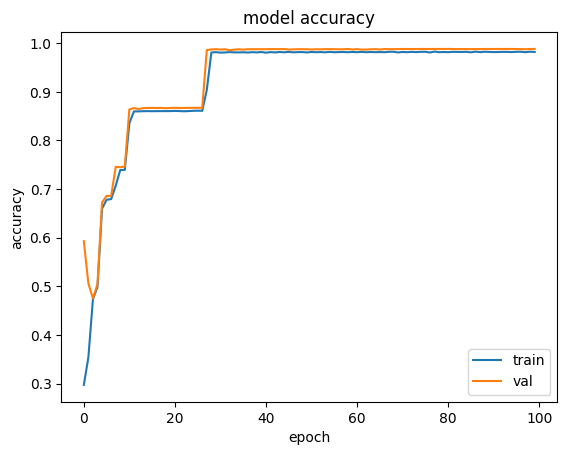

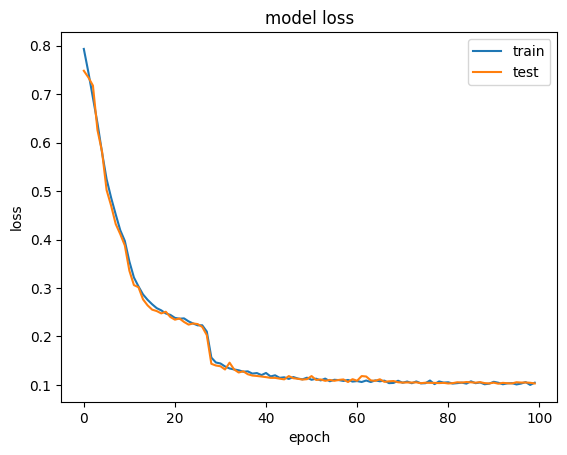

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='lower right')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

Podemos agora aplicar o modelo nos dados de testes e comparar o resultado com mascara original:

In [ ]:
from keras.models import model_from_json
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import pandas as pd
import seaborn as sns

In [ ]:
predict = model.predict(x_test)

36/36 [==============================] - 4s 46ms/step


(-0.5, 127.5, 127.5, -0.5)

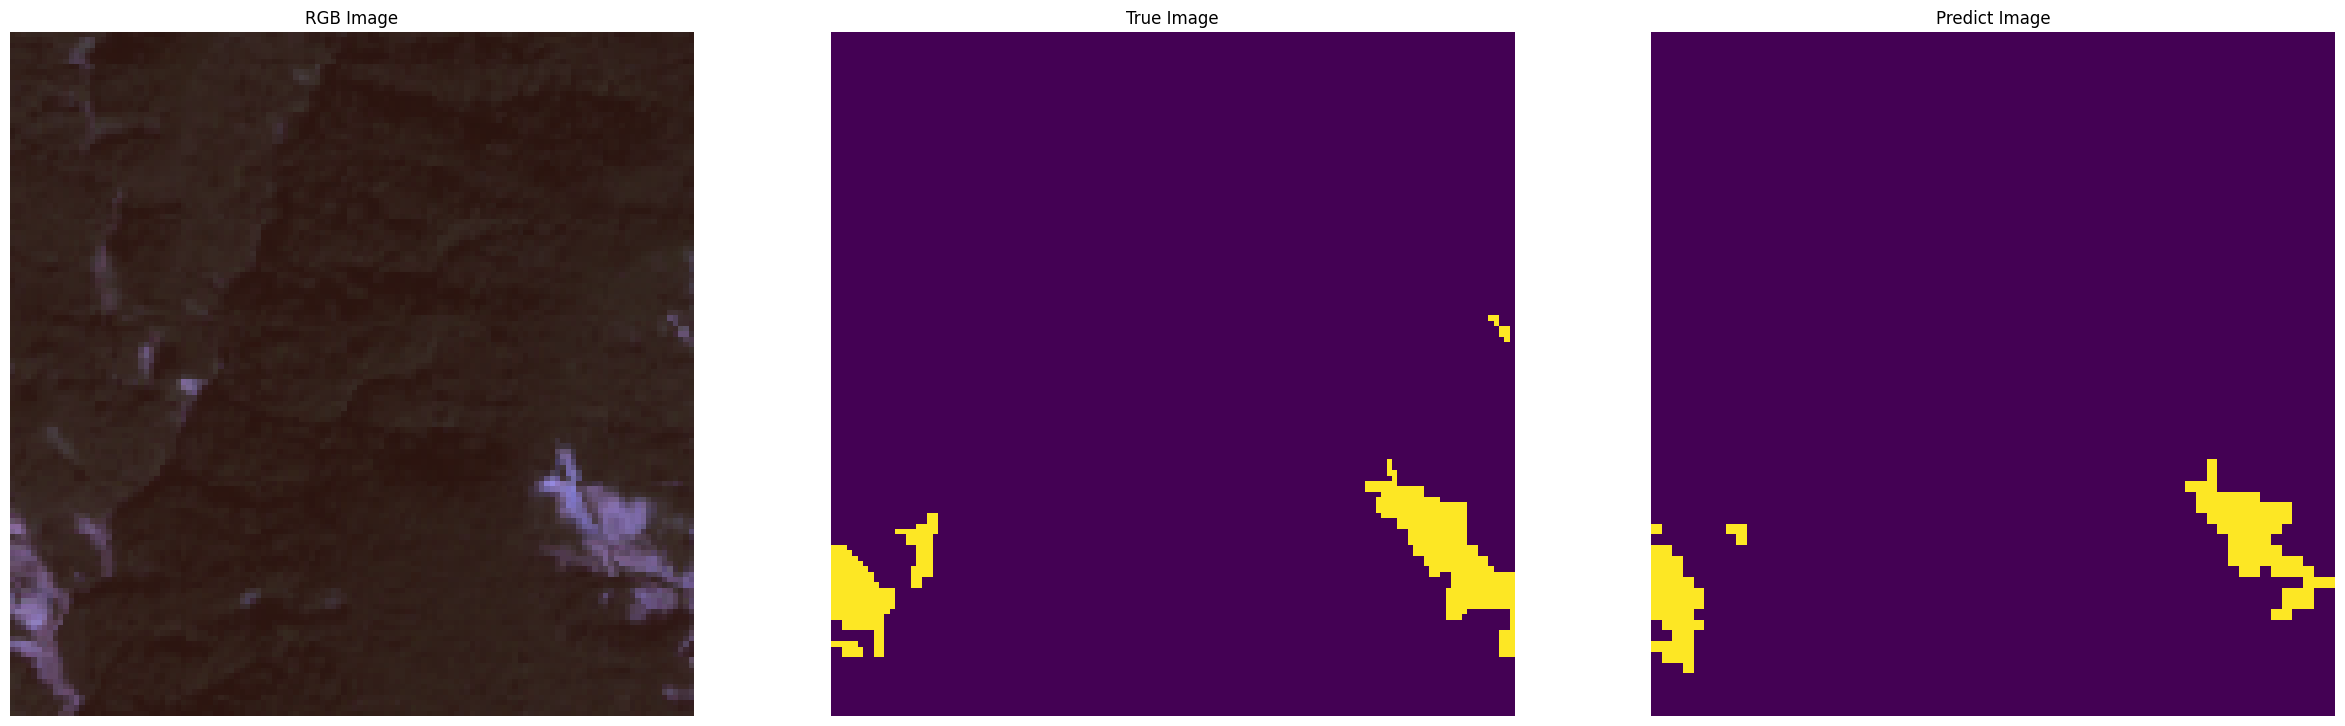

In [ ]:
i = 50
plt.figure(figsize=[30,30])
plt.subplot(131)
plt.imshow(x_test[i,:,:,1:4]/0.2)
plt.title('RGB Image')
plt.axis('off')
plt.subplot(132)
plt.imshow(np.round(y_test[i,:,:,0]))
plt.title('True Image')
plt.axis('off')
plt.subplot(133)
plt.imshow(np.round(predict[i,:,:,0]))
plt.title('Predict Image')
plt.axis('off')

Também calculamos as métricas de validação:

In [ ]:
pred = np.round(predict)

In [ ]:
true = np.round(y_test)

In [ ]:
accuracy = accuracy_score(true.flatten(),pred.flatten())
print(accuracy)

0.9882385789302357


In [ ]:
cm = confusion_matrix(true.flatten(), pred.flatten())
print(cm)

[[18173838    64195]
 [  155482   284245]]


Text(0.5, 58.7222222222222, 'Predito')

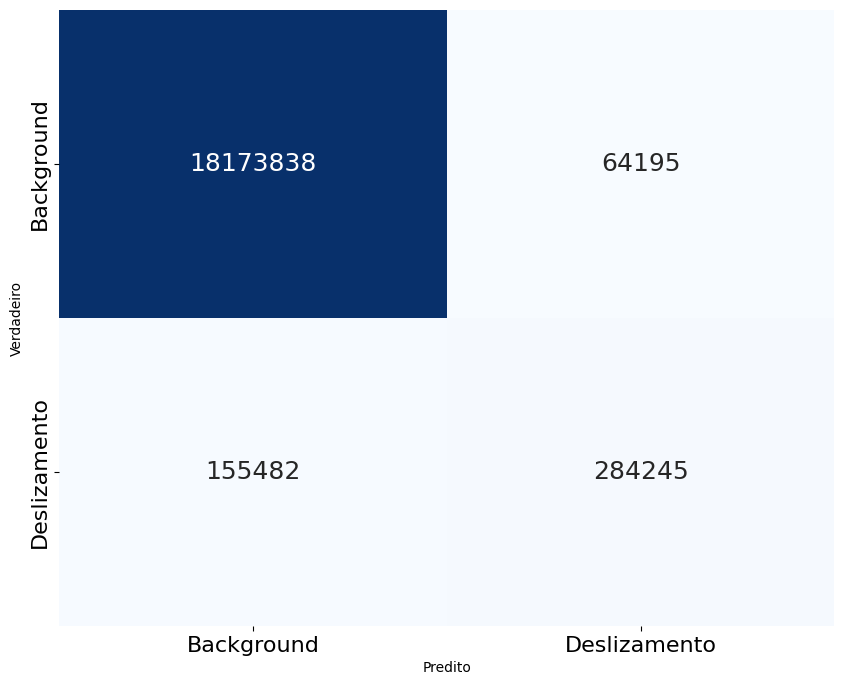

In [ ]:
columns = ['Background', 'Deslizamento']
r1 = pd.DataFrame(data=cm, columns=columns, index=columns)
fig, ax = plt.subplots(figsize=(10,8))
ax = sns.heatmap(r1, annot=True, annot_kws={"size": 18},fmt='d',cmap="Blues", cbar = False)
#for t in ax.texts: t.set_text(t.get_text() + " %")
ax.tick_params(labelsize=16)
ax.set_ylabel('Verdadeiro')
ax.set_xlabel('Predito')